In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(style='whitegrid')

In [1]:
len("""I have been working hard to learn new skills and secure an internship, but my family's income is 36000 INR, so my family has somehow managed to pay my tuition fee. I am interested in learning about AI, but the fee is not affordable for me. If I receive the scholarship, I will be able to study AI through Microsoft Cloud AI and pursue an internship.""".split())

66

When performing **Exploratory Data Analysis (EDA)** on a **numerical feature** using **univariate analysis**, you should study the following aspects:  

### **1. Summary Statistics**  
- **Count** (Number of observations)  
- **Mean** (Average value)  
- **Median** (Middle value)  
- **Mode** (Most frequently occurring value)  
- **Standard Deviation** (Spread of the data)  
- **Variance** (Measure of dispersion)  
- **Range** (Max - Min)  
- **Minimum & Maximum values**  
- **Interquartile Range (IQR)** (Q3 - Q1, helps detect outliers)  

### **2. Distribution Analysis**  
- **Histogram** (To see the shape of the distribution)  
- **Box Plot** (To detect outliers and spread)  
- **Density Plot (KDE Plot)** (For smooth probability distribution)  
- **Q-Q Plot** (To check normality of data)  

### **3. Skewness & Kurtosis**  
- **Skewness** (Indicates if the data is symmetric or skewed)  
  - **Positive Skew:** Tail on the right  
  - **Negative Skew:** Tail on the left  
- **Kurtosis** (Tells whether the data has heavy or light tails compared to a normal distribution)  

### **4. Outlier Detection**  
- **Using IQR Method** (Outliers = values below Q1 - 1.5*IQR or above Q3 + 1.5*IQR)  
- **Using Z-score** (Values beyond ±3 standard deviations)  
- **Boxplot visualization**  

### **5. Missing Values & Imputation**  
- **Count of missing values**  
- **Percentage of missing values**  
- **Strategies to handle missing values:**  
  - Mean/Median Imputation  
  - Forward Fill / Backward Fill  
  - Dropping missing values (if necessary)  

### **6. Transformations (if needed)**  
- **Log Transformation** (For right-skewed data)  
- **Square Root Transformation**  
- **Power Transformation (Box-Cox or Yeo-Johnson)**  
- **Standardization & Normalization** (If needed for further analysis)  

Would you like any code examples for these steps? 🚀

In [5]:
df = pd.read_csv(r'train.csv')

In [8]:
df.sample(10)

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
6309,487,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_427146,u_1oKbZ7KcO7EYNlpOUTj6vEk07Fs,emilylime,1,1622718476,0,0,0,5,100,Won 2nd place in my work chili cookoff (althou...
10208,171,41,35948,Caramel-Pecan Cheesecake Pie,sp_aUSaElGf_35948_c_265771,u_1oKZnCiip7ommiKvbTiSyTX3Pi5,Rgrandisle,1,1622717663,0,0,0,0,100,Picture shows a brown layer between crust and ...
4593,181,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_306390,u_1oKVaXUaGSbQTpOnHc1sxIi557Z,cindihartline,1,1622717860,0,0,0,5,100,"This is a great recipe, I did only put half th..."
8900,13,90,33743,Tennessee Peach Pudding,sp_aUSaElGf_33743_c_422052,u_1oKbyWpeQxaj0r7nz4ZJL5jY2ly,Sandra Love-Rolewicz,1,1622718445,0,9,2,5,335,This was truly good but I changed one item - I...
11966,142,48,9739,Best Ever Potato Soup,sp_aUSaElGf_9739_c_243435,u_1oKWOumCuXTDJGiWSXXLFOkKNUX,d2check,1,1622717548,0,0,0,5,100,Made this soup today since hubby is under the ...
3457,36,25,23222,Baked Mushroom Chicken,sp_aUSaElGf_23222_c_401798,u_1oKVejpduQ8kj5drif27gmqZEGt,DuckyD,1,1622718365,0,0,0,0,100,It SAYS in the top line of the Ingredients th...
1915,41,86,4383,First-Place Coconut Macaroons,sp_aUSaElGf_4383_c_413962,u_1oKdeAjy6BB8DR1RAZ2itPFQhxV,JenniferLockwood,1,1622718379,0,1,2,2,127,"The taste was pretty good, but the texture and..."
3156,62,81,27626,Skillet Shepherd’s Pie,sp_aUSaElGf_27626_c_230256,u_1oKVaK55qyXN7BdWCOW8C9dZiNz,hyattmyers,1,1622717489,0,0,0,5,100,Jim and Dee likes. Better then other recipes t...
4914,78,23,14600,Buttery Cornbread,sp_aUSaElGf_14600_c_374076,u_1oKVwDfh7YqGPqu5vHi1jfdzmVB,jnestler,1,1622718174,0,0,0,5,100,Wow! I have used this recipe since I first fou...
2036,65,38,1063,Frosted Banana Bars,sp_aUSaElGf_1063_c_257255,u_1oKVuM8oXftApANInpGSUMWM47h,mrkcook,1,1622717606,0,1,0,5,193,My son LOVED these banana bars and has been as...


# Univariate Analysis
## RecipeNumber: Placement of the recipe on the top 100 recipes list

In [12]:
df['RecipeNumber'].value_counts()

RecipeNumber
3     553
1     483
2     372
9     313
13    307
     ... 
54     68
97     65
91     64
72     64
61     19
Name: count, Length: 100, dtype: int64

(array([3103., 2018., 1411., 1287., 1180., 1023.,  915.,  955.,  973.,
         771.]),
 array([  1. ,  10.9,  20.8,  30.7,  40.6,  50.5,  60.4,  70.3,  80.2,
         90.1, 100. ]),
 <BarContainer object of 10 artists>)

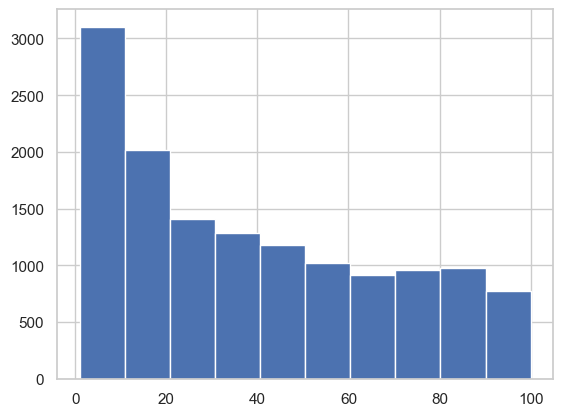

In [33]:
plt.hist(df['RecipeNumber'])

<Axes: xlabel='RecipeNumber', ylabel='Count'>

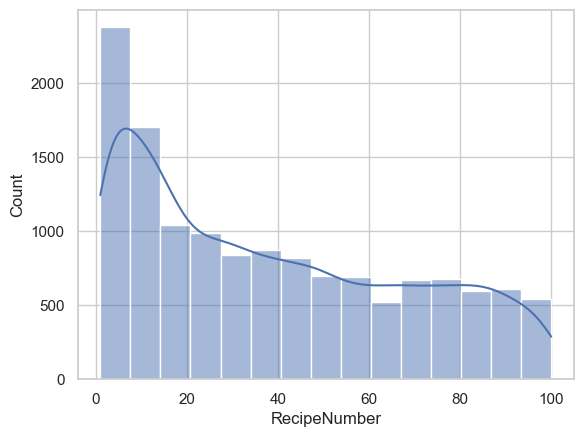

In [37]:
sns.histplot(data=df,x='RecipeNumber',bins=15,kde=True)

<Axes: xlabel='RecipeNumber'>

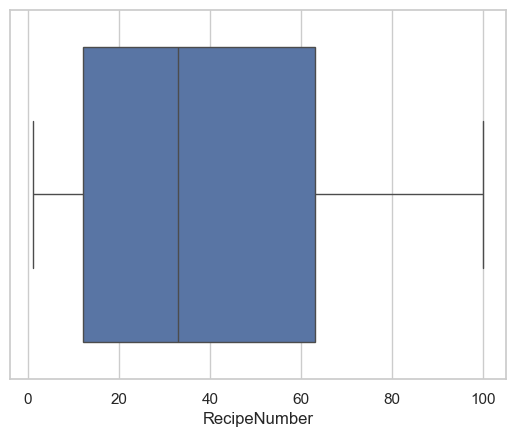

In [38]:
sns.boxplot(data=df,x='RecipeNumber')

In [25]:
print(' #unique values at each column')
for i in df.columns:
    print(f' {i:<20} {df[i].nunique()}')


 #unique values at each column
 ID                   701
 RecipeNumber         100
 RecipeCode           100
 RecipeName           100
 CommentID            13636
 UserID               10783
 UserName             10620
 UserReputation       20
 CreationTimestamp    2422
 ReplyCount           4
 ThumbsUpCount        57
 ThumbsDownCount      51
 Rating               6
 BestScore            525
 Recipe_Review        13370


In [29]:
df[df['RecipeCode'] == df['RecipeCode'][23]][['RecipeCode', 'RecipeName','RecipeNumber']]

,RecipeCode,RecipeName,RecipeNumber
23,24886,Chicken and Dumplings,63
35,24886,Chicken and Dumplings,63
51,24886,Chicken and Dumplings,63
277,24886,Chicken and Dumplings,63
403,24886,Chicken and Dumplings,63
...,...,...,...
13506,24886,Chicken and Dumplings,63
13557,24886,Chicken and Dumplings,63
13573,24886,Chicken and Dumplings,63
13601,24886,Chicken and Dumplings,63
